<a href="https://colab.research.google.com/github/HaSSSTI/Galaxy_delensing_pytorch/blob/main/torch_astro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown

In [ ]:
import gdown
# https://drive.google.com/file/d/15AUlevQVEM60z1OfL0B2FPJYsQ7pV2vu/view?usp=share_link
# https://drive.google.com/file/d/1pVTEMDj2aKdF-QctpuC8bcXmD9IoSowl/view?usp=share_link
id1 = "15AUlevQVEM60z1OfL0B2FPJYsQ7pV2vu"
id2 = "1pVTEMDj2aKdF-QctpuC8bcXmD9IoSowl"
id3 = "1ZJXwjzxJtk-4PwPGogKKyVWqoPwYOcM0"
url = "https://drive.google.com/uc?id="+id1
output = 'L.txt'
gdown.download(url, output, quiet=False)

url = "https://drive.google.com/uc?id="+id2
output = 'NGC.jpg'
gdown.download(url, output, quiet=False)

url = "https://drive.google.com/uc?id="+id3
output = 'R.jpg'
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=15AUlevQVEM60z1OfL0B2FPJYsQ7pV2vu
To: /content/L.txt
100%|██████████| 889k/889k [00:00<00:00, 40.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pVTEMDj2aKdF-QctpuC8bcXmD9IoSowl
To: /content/NGC.jpg
100%|██████████| 1.79M/1.79M [00:00<00:00, 60.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZJXwjzxJtk-4PwPGogKKyVWqoPwYOcM0
To: /content/R.jpg
100%|██████████| 12.0k/12.0k [00:00<00:00, 24.9MB/s]


'R.jpg'

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import numpy as np
from scipy import sparse
import torch
import imageio as iio
import matplotlib.pyplot as plt
from skimage.transform import resize
import scipy.ndimage

In [ ]:
x = np.fromfile("L.txt",sep=" ").reshape(-1,3)
Row=x[:, 0]
int_row = Row.astype(int)
Column=x[:,1]
int_Column = Column.astype(int)
Data=x[:,2]
L = sparse.coo_matrix((Data,(int_row,int_Column)),(int_row.max()+1,40000))


In [ ]:
from ast import Lambda
#Proir = S_t*C_p__inverse*S
#S=1000*1   S_T= 1*10000    c_p= 10000*10000
C_p_np = np.diag(np.full(10000,1))
C_p = torch.from_numpy(C_p_np)
C_p= C_p.to(torch.float32)
#C_p_inverse = torch.inverse(C_p)


In [ ]:

values = L.data
indices = np.vstack((L.row, L.col))
i = torch.LongTensor(indices)
v = torch.FloatTensor(values)
shape = L.shape

L = torch.sparse.FloatTensor(i, v, torch.Size(shape))
print (L)

tensor(indices=tensor([[    2,     3,     5,  ...,  9997,  9998,  9999],
                       [10450, 10450, 10252,  ..., 31340, 31142, 31142]]),
       values=tensor([0.0385, 0.0250, 0.0867,  ..., 0.0340, 0.2410, 0.0171]),
       size=(10000, 40000), nnz=46428, layout=torch.sparse_coo)


<ipython-input-7-7244f32283e0>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = iio.imread("NGC.jpg")


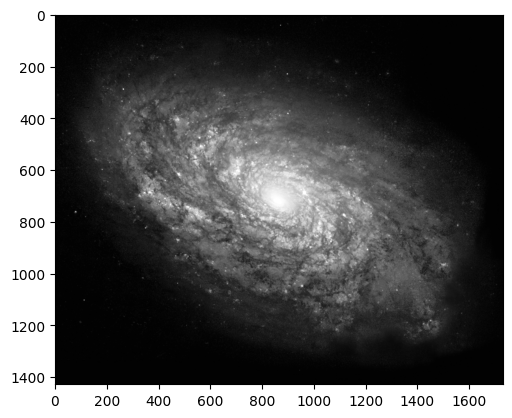

In [ ]:
img = iio.imread("NGC.jpg")
img  =  img.mean(axis=2)
plt.imshow(img,cmap="gray")
# f.savefig("img.png")

In [ ]:
np_img = np.array(img)

print(np_img.shape)

(1428, 1730)


In [ ]:
from numpy import asarray
numpydata = asarray(img)
print(numpydata)

[[2.         2.         2.         ... 2.         2.         2.        ]
 [2.         2.         2.         ... 2.         2.         2.        ]
 [2.         2.         2.33333333 ... 2.         2.         2.        ]
 ...
 [2.         2.         2.         ... 2.         2.         2.        ]
 [2.         2.         2.         ... 2.         2.         2.        ]
 [2.         2.         2.         ... 2.         2.         2.        ]]


In [ ]:
max= np. max(numpydata)
print('max=', max)
min=np. min(numpydata)
print('min=', min)
mean= np. mean(numpydata)
print('mean=', mean)
std= np. std(numpydata)
print('std=', std)

max= 255.0
min= 0.0
mean= 44.741385610120766
std= 51.416358806522446


In [ ]:
np.histogram (numpydata)

(array([1271281,  360108,  253356,  230257,  148241,   83355,   53367,
          37045,   23951,    9479]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]))

(array([1271281.,  360108.,  253356.,  230257.,  148241.,   83355.,
          53367.,   37045.,   23951.,    9479.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

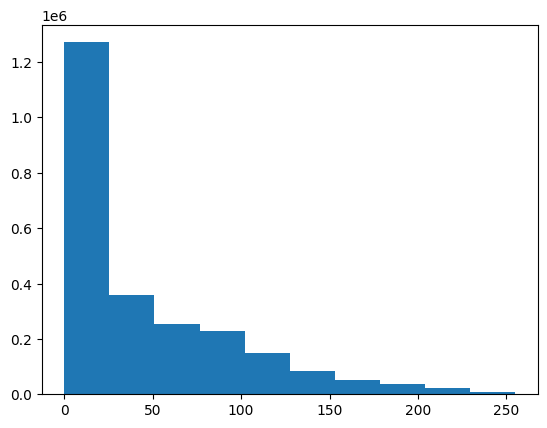

In [ ]:
import matplotlib.pyplot as plt
plt.hist (numpydata.flat)

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# img = mpimg.imread(img.jpg)
# print(img)

In [ ]:
# import matplotlib.pyplot as plt

# img = plt.imread('NGC.jpg')
# rows,cols,colors = img.shape # gives dimensions for RGB array
# img_size = rows*cols*colors
# img_1D_vector = img.reshape(img_size)
# np. set_printoptions(threshold=np. inf)
# print(img_1D_vector)
# #print(img_1D_vector)
# import numpy as np
# #np.set_printoptions(threshold=np.inf)
# #img2 = img_1D_vector.reshape(rows,cols,colors)
# import sys
# import numpy
# numpy.set_printoptions(threshold=sys.maxsize)
# #print(numpy.set_printoptions)

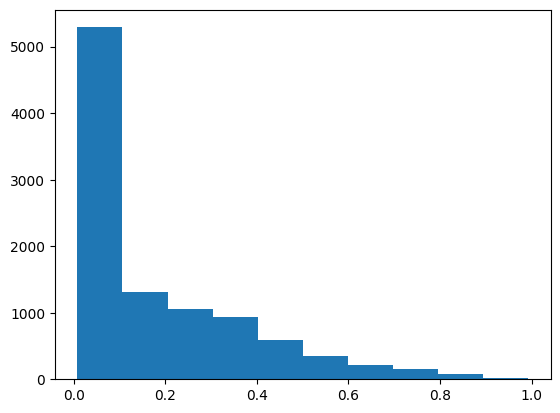

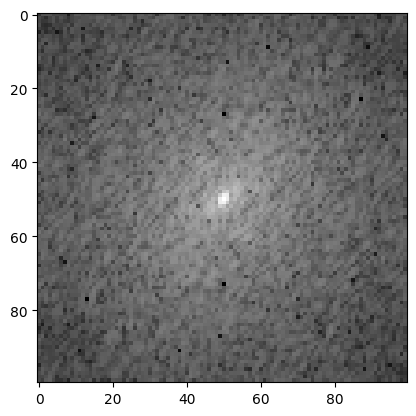

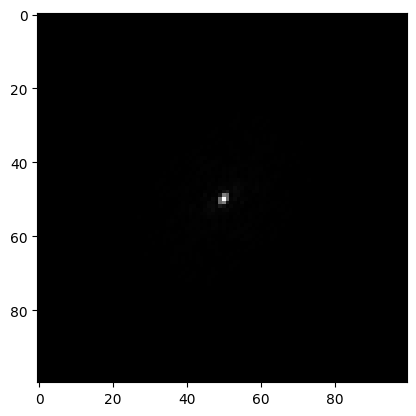

In [ ]:
img = resize(img, (100, 100))
length = np.prod(img.shape)
s_true = img.reshape((length,1))
s_true = s_true/255
plt.hist(s_true)
plt.show()
k_img = np.abs(np.fft.fftshift(np.fft.fft2(img)))
plt.imshow(np.log(k_img),cmap="gray")
plt.show()
plt.imshow((k_img),cmap="gray")

In [ ]:
# import matplotlib.pyplot as plt
# plt.hist (k_img.flat)

In [ ]:
# import pywt
# coeffs = pywt.dwt2(img, 'haar')
# cA, (cH, cV, cD) = coeffs
# plt.imshow(cA)
# plt.show()
# plt.imshow(cH, interpolation="nearest", cmap=plt.cm.gray)
# plt.show()
# plt.imshow(cV, interpolation="nearest", cmap=plt.cm.gray)
# plt.show()
# plt.imshow(cD, interpolation="nearest", cmap=plt.cm.gray)
# plt.show()

In [ ]:
# plt.hist (cH.flat)

In [ ]:
#s_true_t= torch.from_numpy(s_true).cuda()
#Prior= torch.transpose(s_true_t,1,0)@ C_p_inverse.cuda() @ s_true_t

In [ ]:
#Prior_trace= torch.trace(Prior)

In [ ]:
L_T = torch.transpose(L,1,0).cuda()
D = torch.sparse.mm(L_T,torch.FloatTensor(s_true).cuda())
D_withNoise = D #+ torch.randn_like(D)*0.1
plt.imshow(D_withNoise.cpu().detach().numpy().reshape((200,200)))
plt.show()
# R= TORCH.RANDN_LIKE(D)

RuntimeError: ignored

In [ ]:
# D[M*n] = L[m*z] * S[z*n] ==> s=D*pinv(L) ==> D - L*S = 0 ==>Downhil? put random number in s and see how it is good? Another solution? f = D - L*S => min? df/ds = 0 => GD: S(new) = S(old) - lr*df/ds => df/ds = - L*dS/ds

In [ ]:
def l1(s,C_p_inverse):
  with torch.no_grad():
    coef_s = get_starlet(4,s.cpu().detach().numpy().reshape(100,100))
    l1 = np.sum(np.abs(coef_s[0:-1]))
    return l1
  # return torch.sqrt(torch.transpose(s,1,0)@ C_p_inverse@ s)

def l2(s,C_p_inverse):
  return torch.transpose(s,1,0)@ C_p_inverse@ s

def zero_reg(s,C_p_inverse):
  return torch.LongTensor([0.0]).to(s.device)

from torch.distributions.half_cauchy import HalfCauchy
c = HalfCauchy(torch.tensor([1.0]))
global factor
def horse_shoe(s,C_p_inverse):
  ta = c.sample().to(s.device)**2
  hs = torch.sum(-1*torch.log(torch.log(1+(2*factor/(s**2)))))
  # Beta=
  # print(hs.detach().cpu())
  return hs

def cauchy(s,C_p_inverse):
  ta = c.sample().to(s.device)**2
  cu = torch.sum(torch.log(ta+(s**2)))
  return cu


In [ ]:
# from astropy.io import fits
# red = fits.PrimaryHDU(data=D_withNoise.detach().cpu().numpy())
# red.header['LATOBS'] = "32:11:56" # add spurious header info
# red.header['LONGOBS'] = "110:56"
# red.writeto('NGC_fix.fits')

In [ ]:
#  !pip install lenstronomy
#  !pip install slitronomy
#  __author__ = 'aymgal'

# # this files groups utility functions to extract and prepare source galaxy
# # for the generation of simulated HST-like lensed images

# import os
# import numpy as np
# import astropy.io.fits as pf


# def prepare_highres_source(ra_source, dec_source, galaxy_name='NGC',
#                            magnitude=None, amp=1.2e3):
#     # this_dir = os.path.dirname(os.path.realpath(__file__))
#     #source_dir = os.path.join(this_dir, 'data', 'sources_TDLMC')
#     source_filename = '{}_fix.fits'.format(galaxy_name)
#      # load a source galaxy pre-generated with galsim
#     with pf.open(os.path.join(source_filename)) as f:
#         source_image = f[0].data
#     # remove negative pixels
#     source_image[source_image < 0] = 0.
#     # normalize so max is 1 (arbirary flux units)
#     source_image /= source_image.max()
#     # specify scale, to target half-light radius  # TODO!
#     galaxy_scale = 1e-2   # effectively set the angular size
#     # light profile in lenstronomy conventions
#     source_model_list = ['INTERPOL']
#     kwargs_interpol_source = {'image': source_image, 'scale': galaxy_scale,
#                               'center_x': ra_source, 'center_y': dec_source, 'phi_G': 0}
#     if magnitude is not None:
#         kwargs_interpol_source['magnitude'] = magnitude
#     else:
#         kwargs_interpol_source['amp'] = amp
#     kwargs_source = [kwargs_interpol_source]
#     return source_model_list, kwargs_source


# def prepare_highres_source_multiple(source_pos_list, galaxy_name_list, mag_list=None, amp_list=None):
#     if mag_list is None:
#         mag_list = [None]*len(source_pos_list)
#     if amp_list is None:
#         amp_list = [1.2e3]*len(source_pos_list)
#     source_model_list, kwargs_source = [], []
#     for (ra, dec), name, mag, amp in zip(source_pos_list, galaxy_name_list, mag_list, amp_list):
#         source_model_list_s, kwargs_source_s = prepare_highres_source(ra, dec, galaxy_name=name, magnitude=mag, amp=amp)
#         source_model_list += source_model_list_s
#         kwargs_source += kwargs_source_s
#     return source_model_list, kwargs_source

# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

# import os
# import copy
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import LogNorm

# from lenstronomy.LightModel.light_model import LightModel
# from lenstronomy.LightModel.Profiles.starlets import SLIT_Starlets
# import lenstronomy.Util.util as lenstro_util
# from slitronomy.Util.plot_util import nice_colorbar
# cmap_flux = copy.deepcopy(plt.get_cmap('cubehelix'))
# cmap_flux.set_bad(color='black', alpha=1)

# v_min, v_max = 1e-3, None

# num_pix = 400
# delta_pix = 0.01
# ra_grid, dec_grid, ra_at_xy_0, dec_at_xy_0, _, _, transform_pix2angle, _ \
#     = lenstro_util.make_grid_with_coordtransform(num_pix, delta_pix, subgrid_res=1, inverse=False)

# ra_source, dec_source, amp_source = 0, 0, 2e3
# source_model_list, kwargs_source = prepare_highres_source(ra_source, dec_source,galaxy_name='NGC', amp=amp_source)

# # set the scale of the galaxy so that it fills the image
# kwargs_source[0]['scale'] = 0.02

# # generate the image
# source_model_class = LightModel(source_model_list)
# source_sim = source_model_class.surface_brightness(ra_grid, dec_grid, kwargs_source)
# source_sim = lenstro_util.array2image(source_sim) * delta_pix**2  # flux units

In [ ]:
starlet_profile = SLIT_Starlets(thread_count=8, fast_inverse=True, second_gen=True)
def get_starlet(n_scales, source_sim):
  global starlet_profile
  coeffs = starlet_profile.decomposition_2d(source_sim, n_scales=n_scales)
  return coeffs

In [ ]:
coef = get_starlet(6,s_true.reshape(100,100))[0:-1]

In [ ]:
plt.hist(coef[0:-1].reshape(-1))

In [ ]:
from tqdm import tqdm
from tqdm import trange
import torch.optim.lr_scheduler as lr_scheduler

In [ ]:
def find_s(prior_model,reg_fac=1,itr=10000,lr=1e-2):
  s = torch.autograd.Variable(data=torch.rand_like(torch.FloatTensor(s_true)), requires_grad=True)
  #C_p_inverse =Lambda * C_p_inverse
  C_p_inverse = C_p.cuda()
  with torch.no_grad():
    s = s.cuda()
    s.requires_grad=True
  act = torch.nn.Softplus()
  # itr = 1000
  loss_m = np.zeros((1,int(itr/10)))
  prior_m = np.zeros((1,int(itr/10)))
  optim = torch.optim.SGD([s], lr=lr, momentum=0.9)
  scheduler = lr_scheduler.ExponentialLR(optim, gamma=0.999)
  loss_func = torch.nn.MSELoss()
  # s = s.cuda()
  with trange(itr) as t:
    for i in t:
      with torch.no_grad():
        s[s<0]=0
      d = (torch.sparse.mm(L_T,s))

      loss_ = loss_func(D_withNoise,d)

      prior= prior_model(s,C_p_inverse)

      loss= loss_ + reg_fac * prior

      t.set_postfix(loss=loss_.detach().cpu().numpy(), gen=prior, lr = optim.param_groups[0]['lr'])
      optim.zero_grad()
      loss.backward(retain_graph=True)
      optim.step()



      if i%10==0:
        scheduler.step()
        loss_m[0,int(i/10)] = loss_.detach().cpu().numpy()
        prior_m[0,int(i/10)] = prior


  plt.imshow(s.cpu().detach().numpy().reshape((100,100)))
  plt.colorbar()
  plt.title(str(prior_model))
  plt.show()
  plt.plot(loss_m[0,:].T)
  plt.plot(prior_m[0,:].T)
  plt.yscale('log')
  plt.title(str(np.sum((s_true-s.cpu().detach().numpy())**2)))
  plt.show()
  plt.hist(s.cpu().detach().numpy())
  plt.show()
  return s.cpu().detach().numpy()

In [ ]:
find_s(l1,1e10,itr=500,lr=0.01)

In [ ]:
find_s(l1,0)

100%|██████████| 1000/1000 [00:17<00:00, 55.56it/s, gen=-12466.879, loss=117119260.0, lst=[1, 2], str=h]


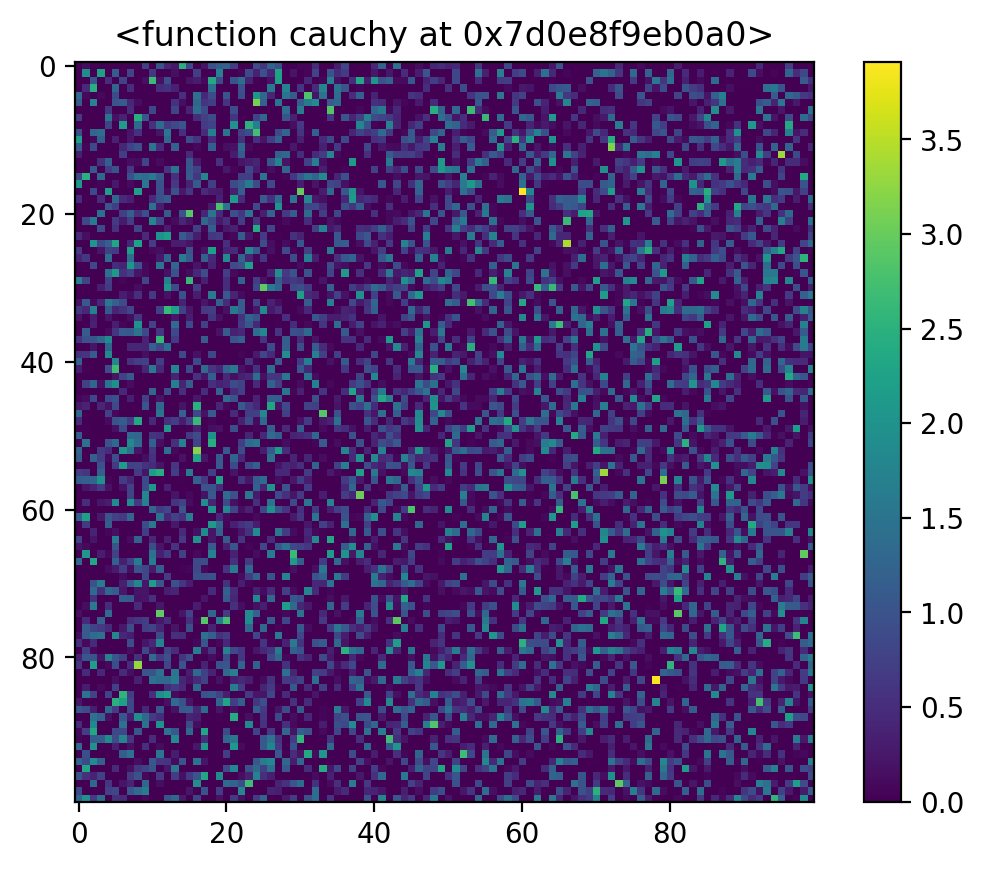

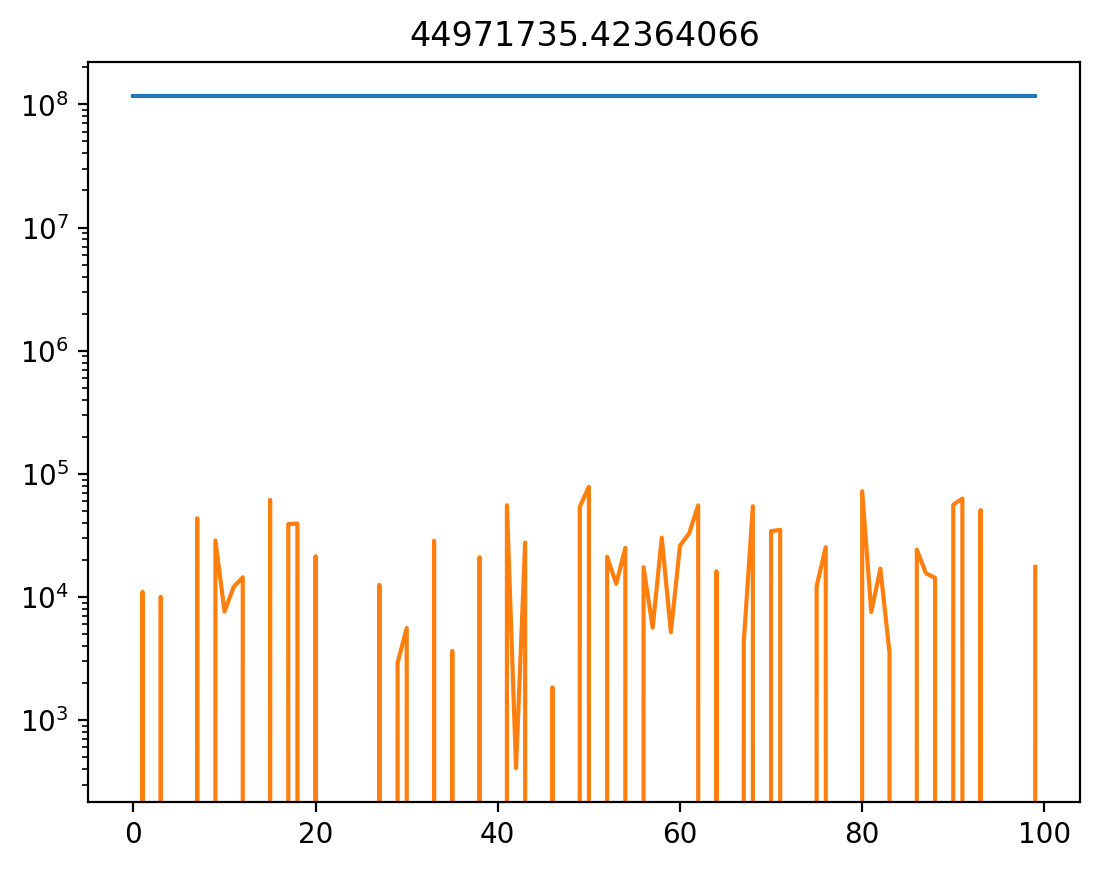

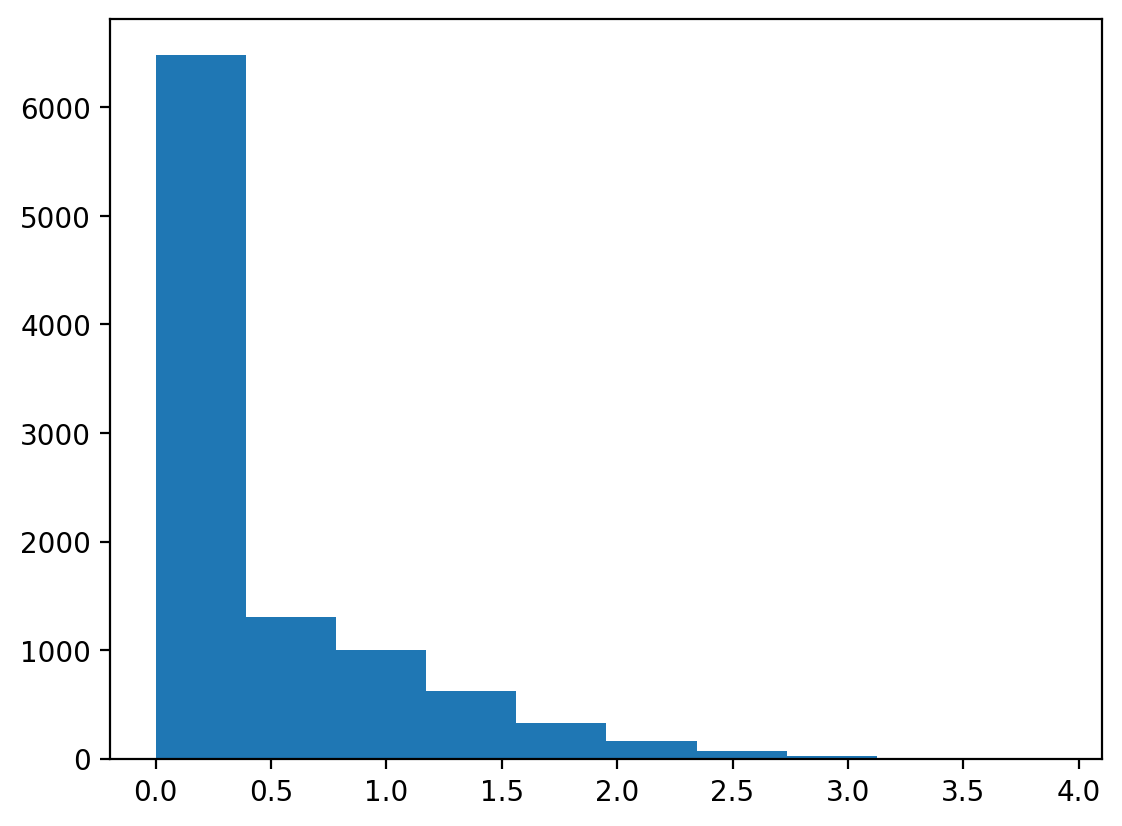

In [ ]:
s_ = find_s(cauchy,0.01,itr=1000)

100%|██████████| 1000/1000 [00:18<00:00, 55.00it/s, gen=-inf, loss=117146850.0, lst=[1, 2], str=h]


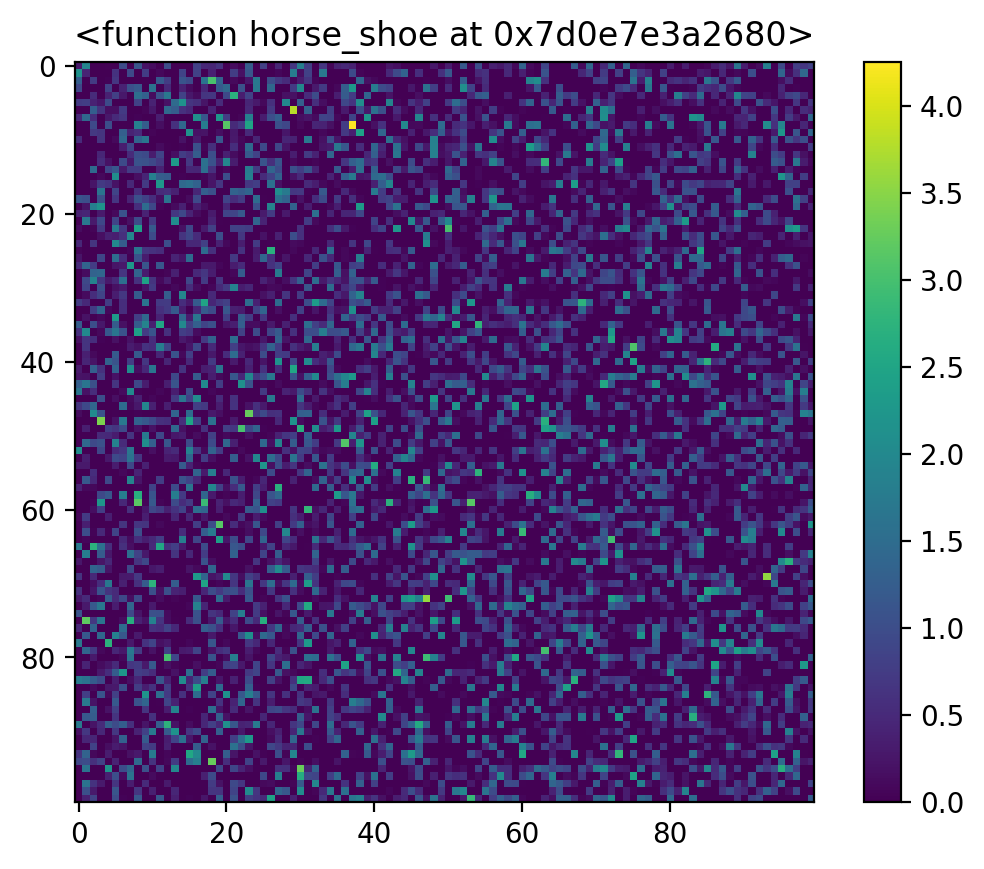

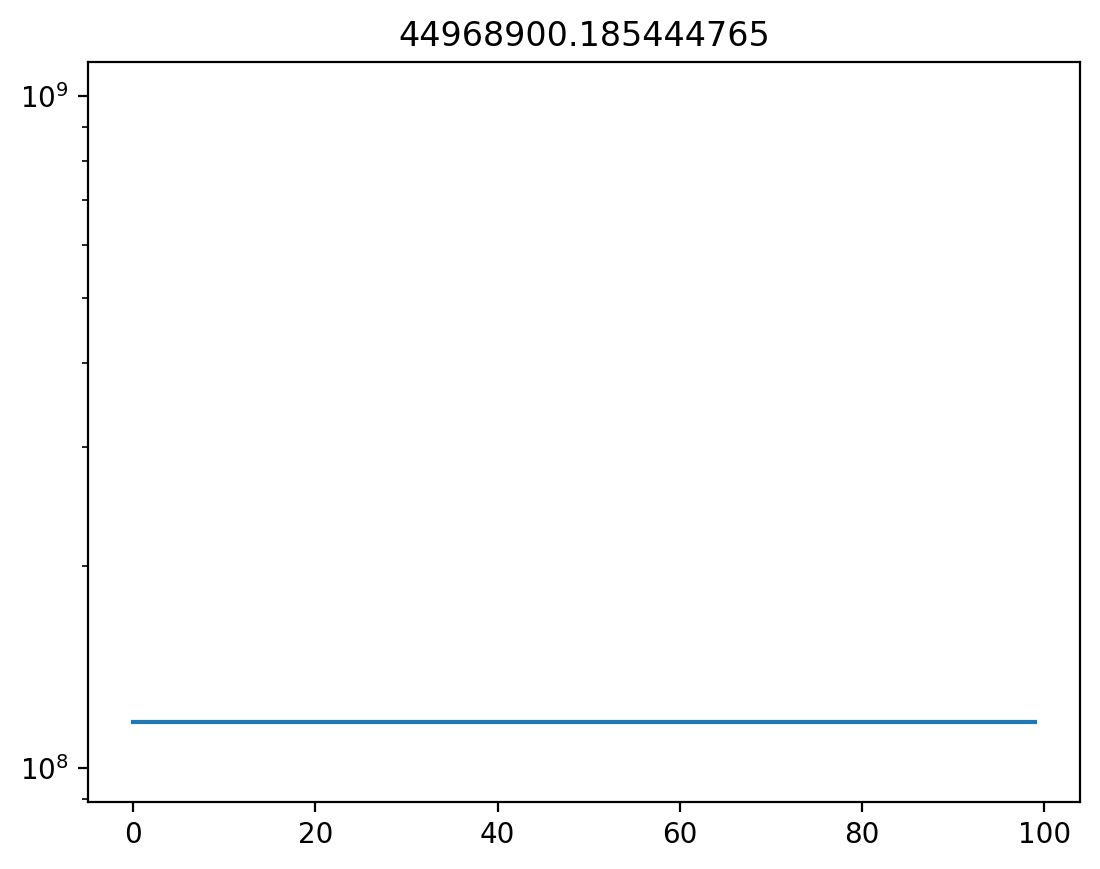

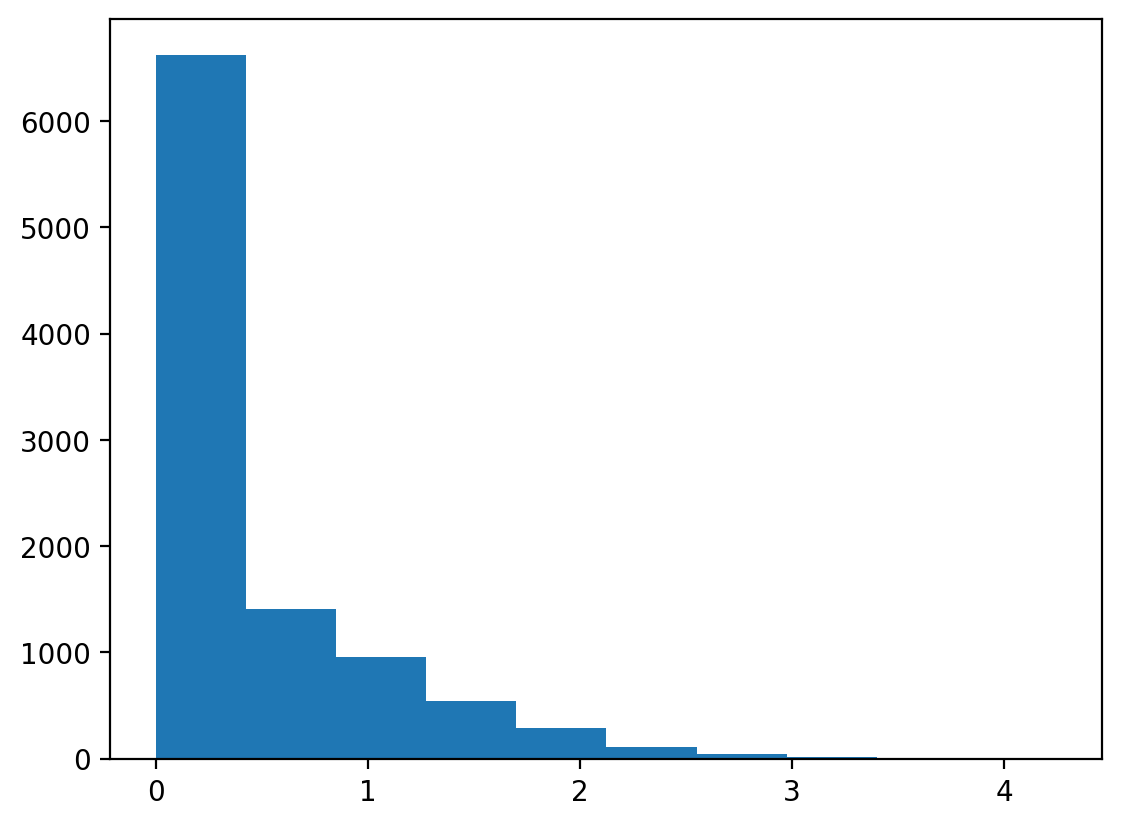

array([[0.2690655],
       [1.9139626],
       [0.       ],
       ...,
       [0.       ],
       [0.       ],
       [1.2045873]], dtype=float32)

In [ ]:
factor = 0.1
find_s(horse_shoe,1e-5,itr=1000)

100%|██████████| 2000/2000 [01:08<00:00, 29.31it/s, gen=[[70.73538]], loss=117196390.0, lst=[1, 2], str=h]


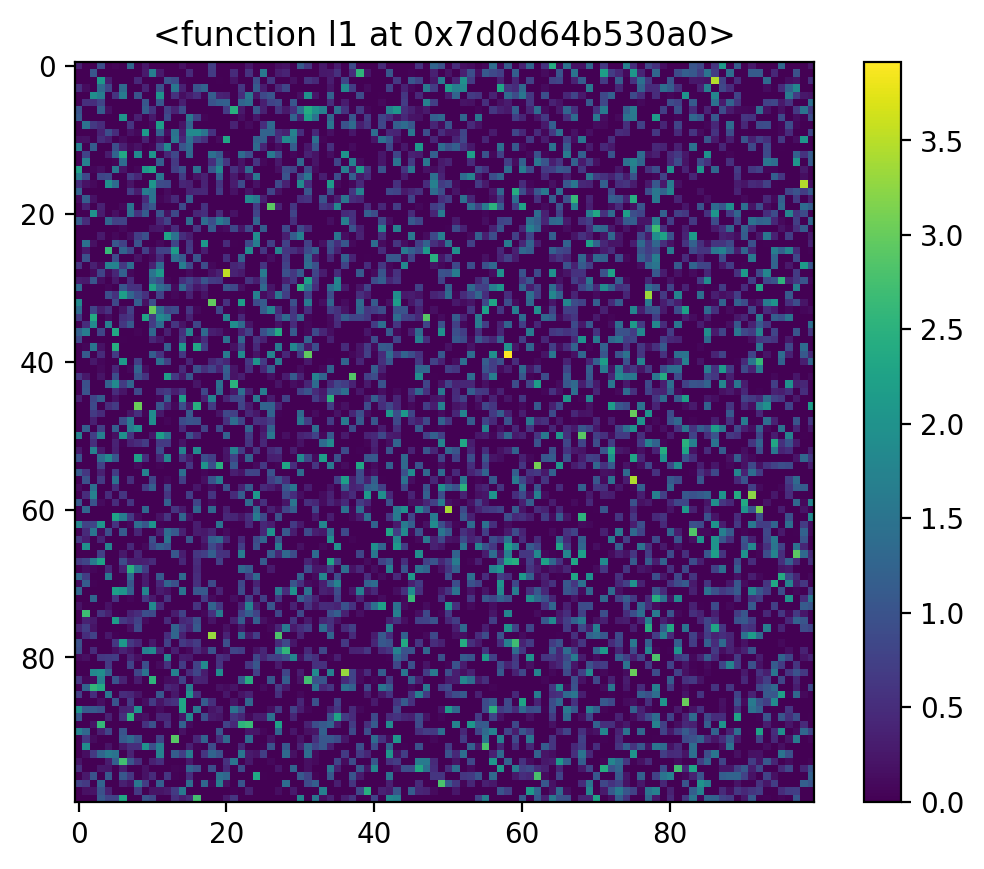

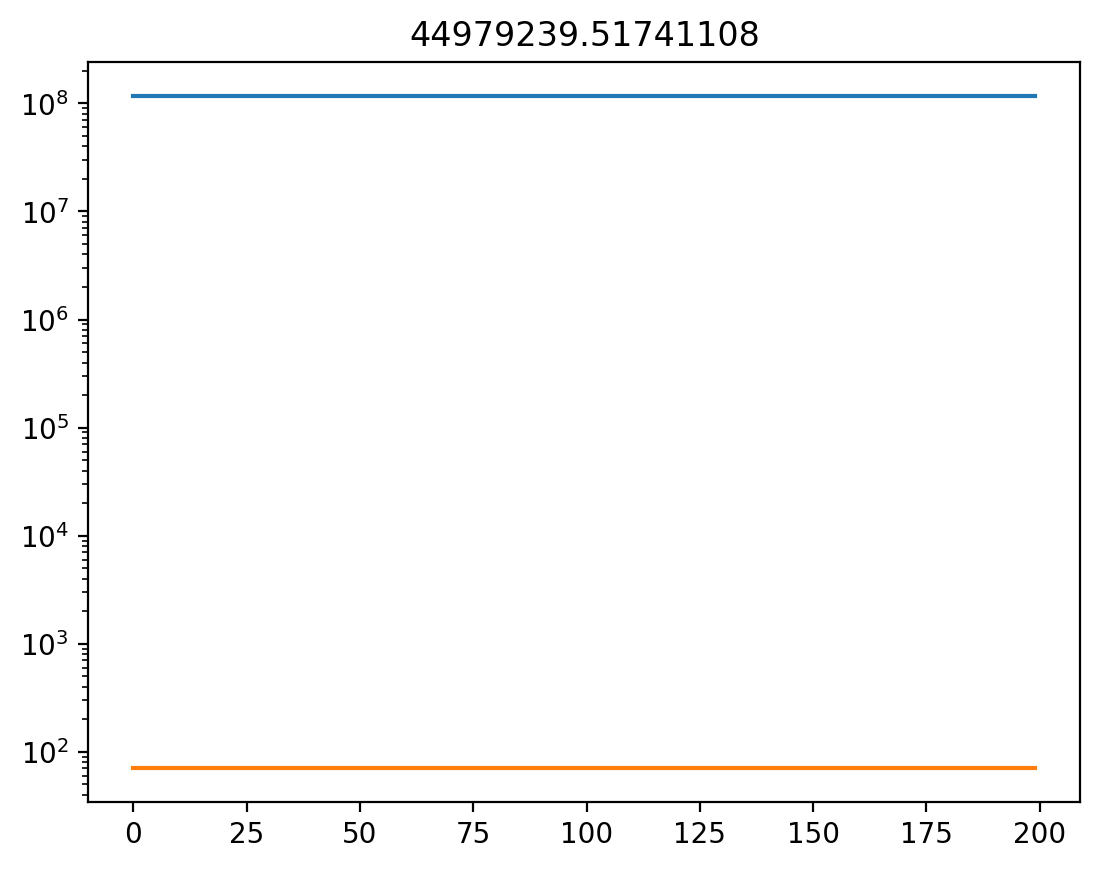

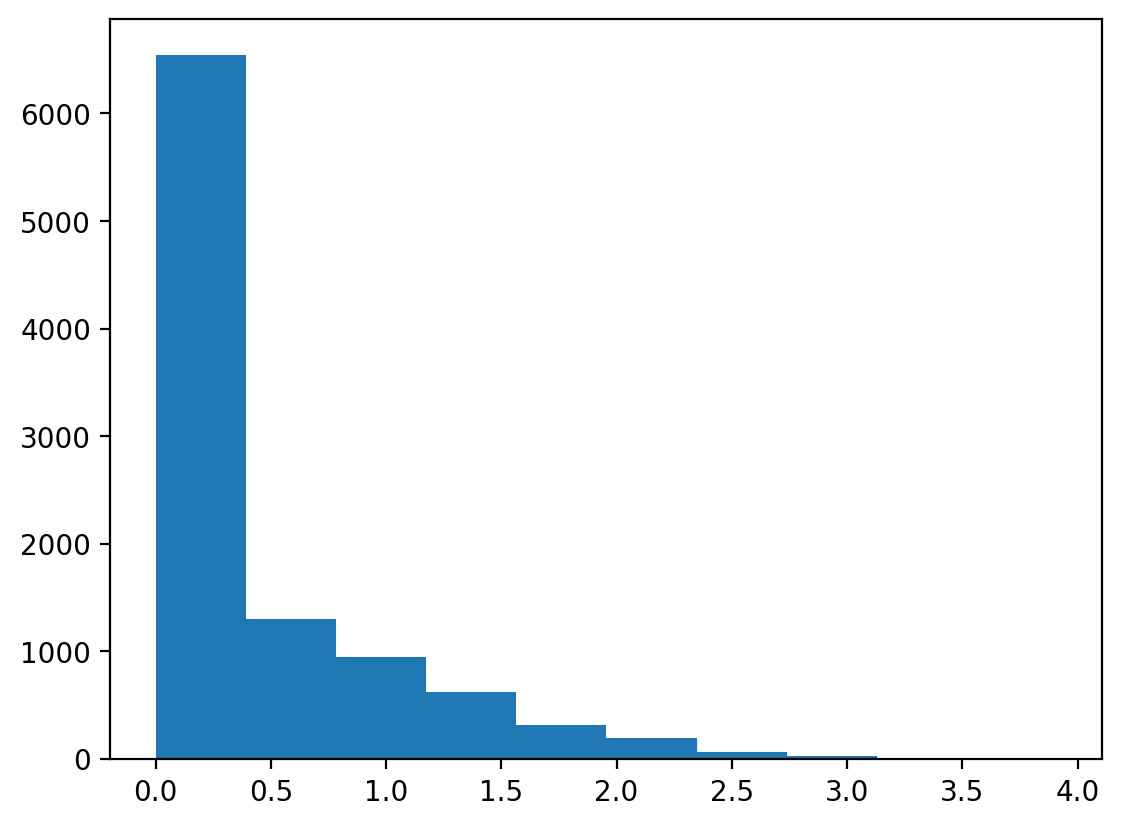

array([[0.3558055],
       [0.       ],
       [0.       ],
       ...,
       [1.0690058],
       [0.       ],
       [0.       ]], dtype=float32)

In [ ]:
find_s(l1,1,itr=2000,lr=0.01)

In [ ]:
find_s(l2,1e-5,itr=1000)

In [ ]:
# import torch.nn as nn
# norm = nn.L1Loss(reduction='mean')

# s_true = torch.tensor(s_true).to('cpu')
# s= torch.tensor(s).to('cpu')
# s = s.clone().detach()

# norm(s, s_true)

In [ ]:
#ax= plt.plot(loss_m[0,:].T)
#plt.yscale("log")

In [ ]:
s = torch.nn.Parameter(data=torch.zeros_like(torch.FloatTensor(s_true)), requires_grad=True)
C_p_inverse = C_p_inverse.cuda()
with torch.no_grad():
  s = s.cuda()
  s.requires_grad=True

itr = 100
loss_m = np.zeros((1,int(itr/100))) ## allocate memory for loss
optim = torch.optim.SGD([s], lr=1e-2, momentum=0.9)
# s = s.cuda()
for i in range(0,itr):
  # s.grad = None
  d = torch.sparse.mm(L_T,s)
  f = D_withNoise - d
  loss = torch.sum((f**2))
  prior= torch.transpose(s,1,0)@ C_p_inverse@ s
  loss= loss+ 10000* prior
  if i%100==0:
    loss_m[0,int(i/100)] = loss.detach().cpu().numpy()
  optim.zero_grad()
  loss.backward()
  optim.step()
plt.imshow(s.cpu().detach().numpy().reshape((100,100)))
plt.show()
plt.plot(loss_m[0,:].T)

In [ ]:
torch.min(s)


In [ ]:
#ax= plt.plot(loss_m[-200,:])


In [ ]:
s = torch.nn.Parameter(data=torch.zeros_like(torch.FloatTensor(s_true)), requires_grad=True)
s=torch.sqrt(s)
C_p_inverse = C_p.cuda()
with torch.no_grad():
  s = s.cuda()
  s.requires_grad=True

itr = 100
loss_m = np.zeros((1,int(itr/1)))
optim = torch.optim.SGD([s], lr=1e-2, momentum=0.9)
# s = s.cuda()
for i in range(0,itr):
  # s.grad = None
  d = torch.sparse.mm(L_T,s)
  f = D_withNoise - d
  loss = (torch.sum((f**2)))
  # loss = torch.sum(torch.abs(f))
  # prior= torch.sum(torch.abs(s))
  loss= loss + 0.001*(prior)
  if i%100==0:
    loss_m[0,int(i/1)] = loss.detach().cpu().numpy()
  optim.zero_grad()
  loss.backward()
  optim.step()
f = D_withNoise - d
loss = (torch.sum((f**2)))
plt.imshow((s.cpu().detach().numpy()).reshape((100,100)))
plt.title("MSE={}".format(loss.cpu().detach().numpy()))
plt.show()
# plt.plot(loss_m[0,:].T)
